## Initialization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
import numpy as np
import pandas as pd
import seaborn as sns
import keras.utils
import keras.backend as K
from keras import optimizers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import utils as np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers.advanced_activations import LeakyReLU

sns.set_style('whitegrid')

## Data Preprocessing

In [3]:
# Wisconsin Breast Cancer,

# load the Wisconsin Breast Cancer, dataset and summarize the shape
from pandas import read_csv
# define the location of the dataset
url = r"C:\Users\User\Downloads\Compressed\data.csv"
# load the dataset
df_w = read_csv(url)
# summarize shape
print("Shape of the dataset: " + str(df_w.shape))

# Number of classes - Binary 
print("Number of classes: " + str(df_w['diagnosis'].unique()))
df_w

Shape of the dataset: (569, 33)
Number of classes: ['M' 'B']


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df_w.drop(['Unnamed: 32','id'], axis = 1 , inplace=True)
df_w.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df_w.diagnosis.replace({"M":1,"B":0},inplace=True)
df_w.diagnosis.unique()

array([1, 0], dtype=int64)

<AxesSubplot:>

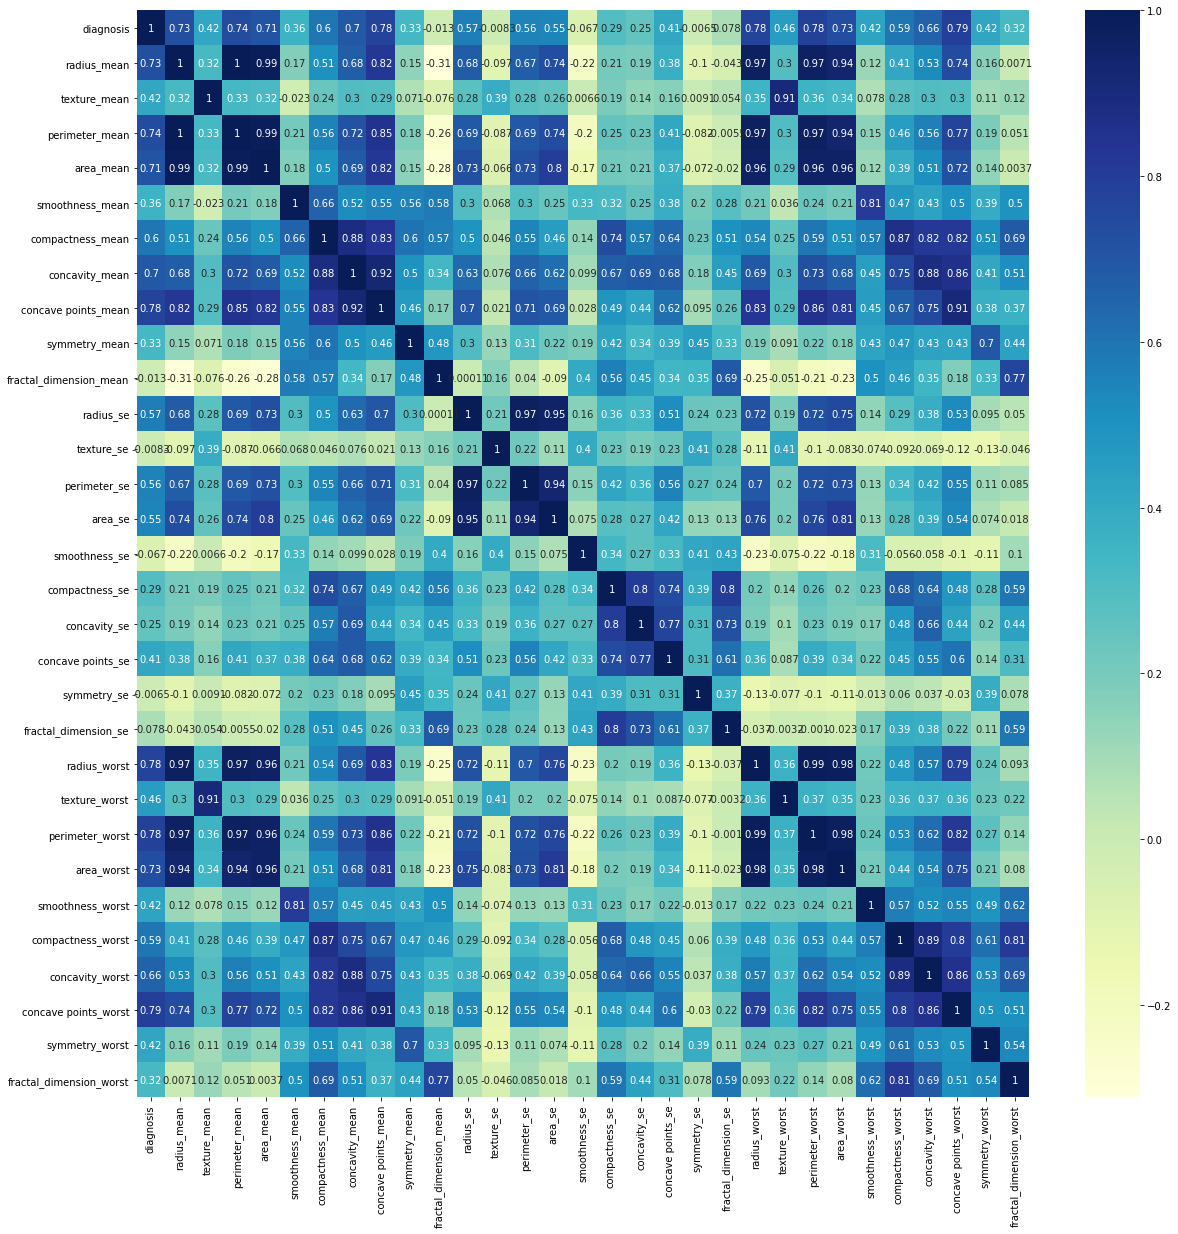

In [8]:
corr = df_w.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_w.corr(), cmap='YlGnBu', annot = True)

In [9]:
corr[abs(corr['diagnosis']) > 0.59].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

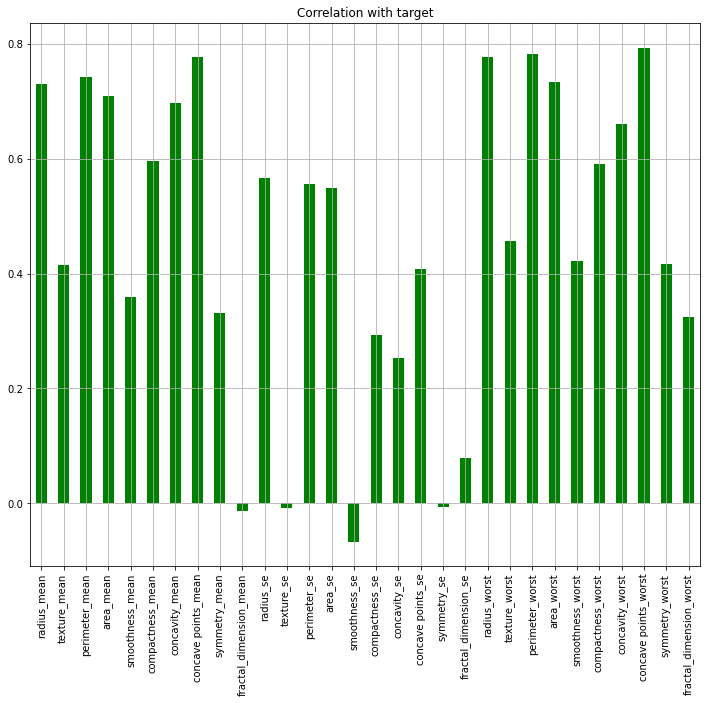

In [10]:
df_w.drop('diagnosis', axis=1).corrwith(df_w.diagnosis).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target",color="green");

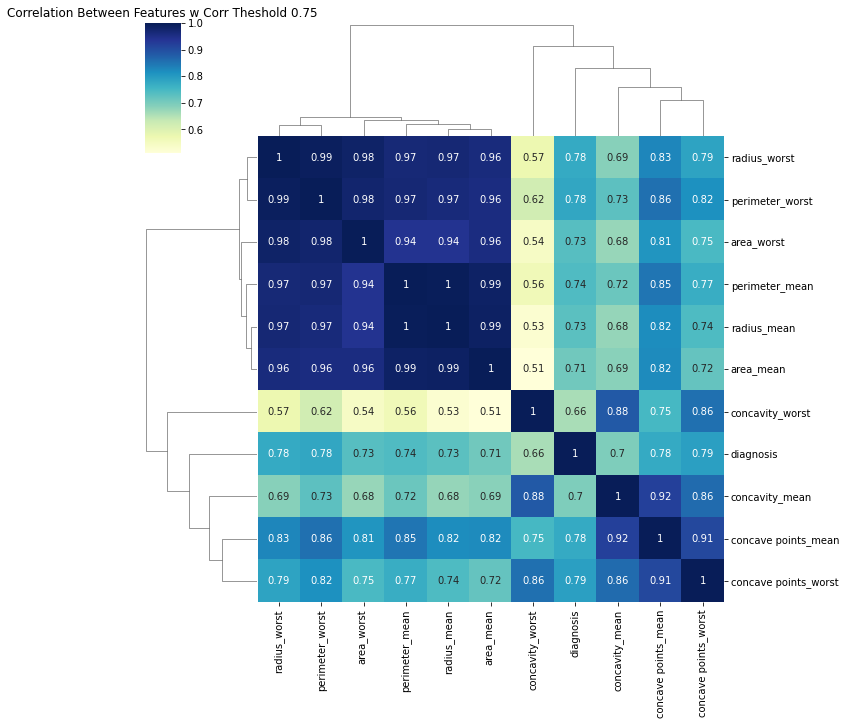

In [11]:
corr_matrix = df_w.corr()
threshold = 0.60 
filtre = np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(df_w[corr_features].corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

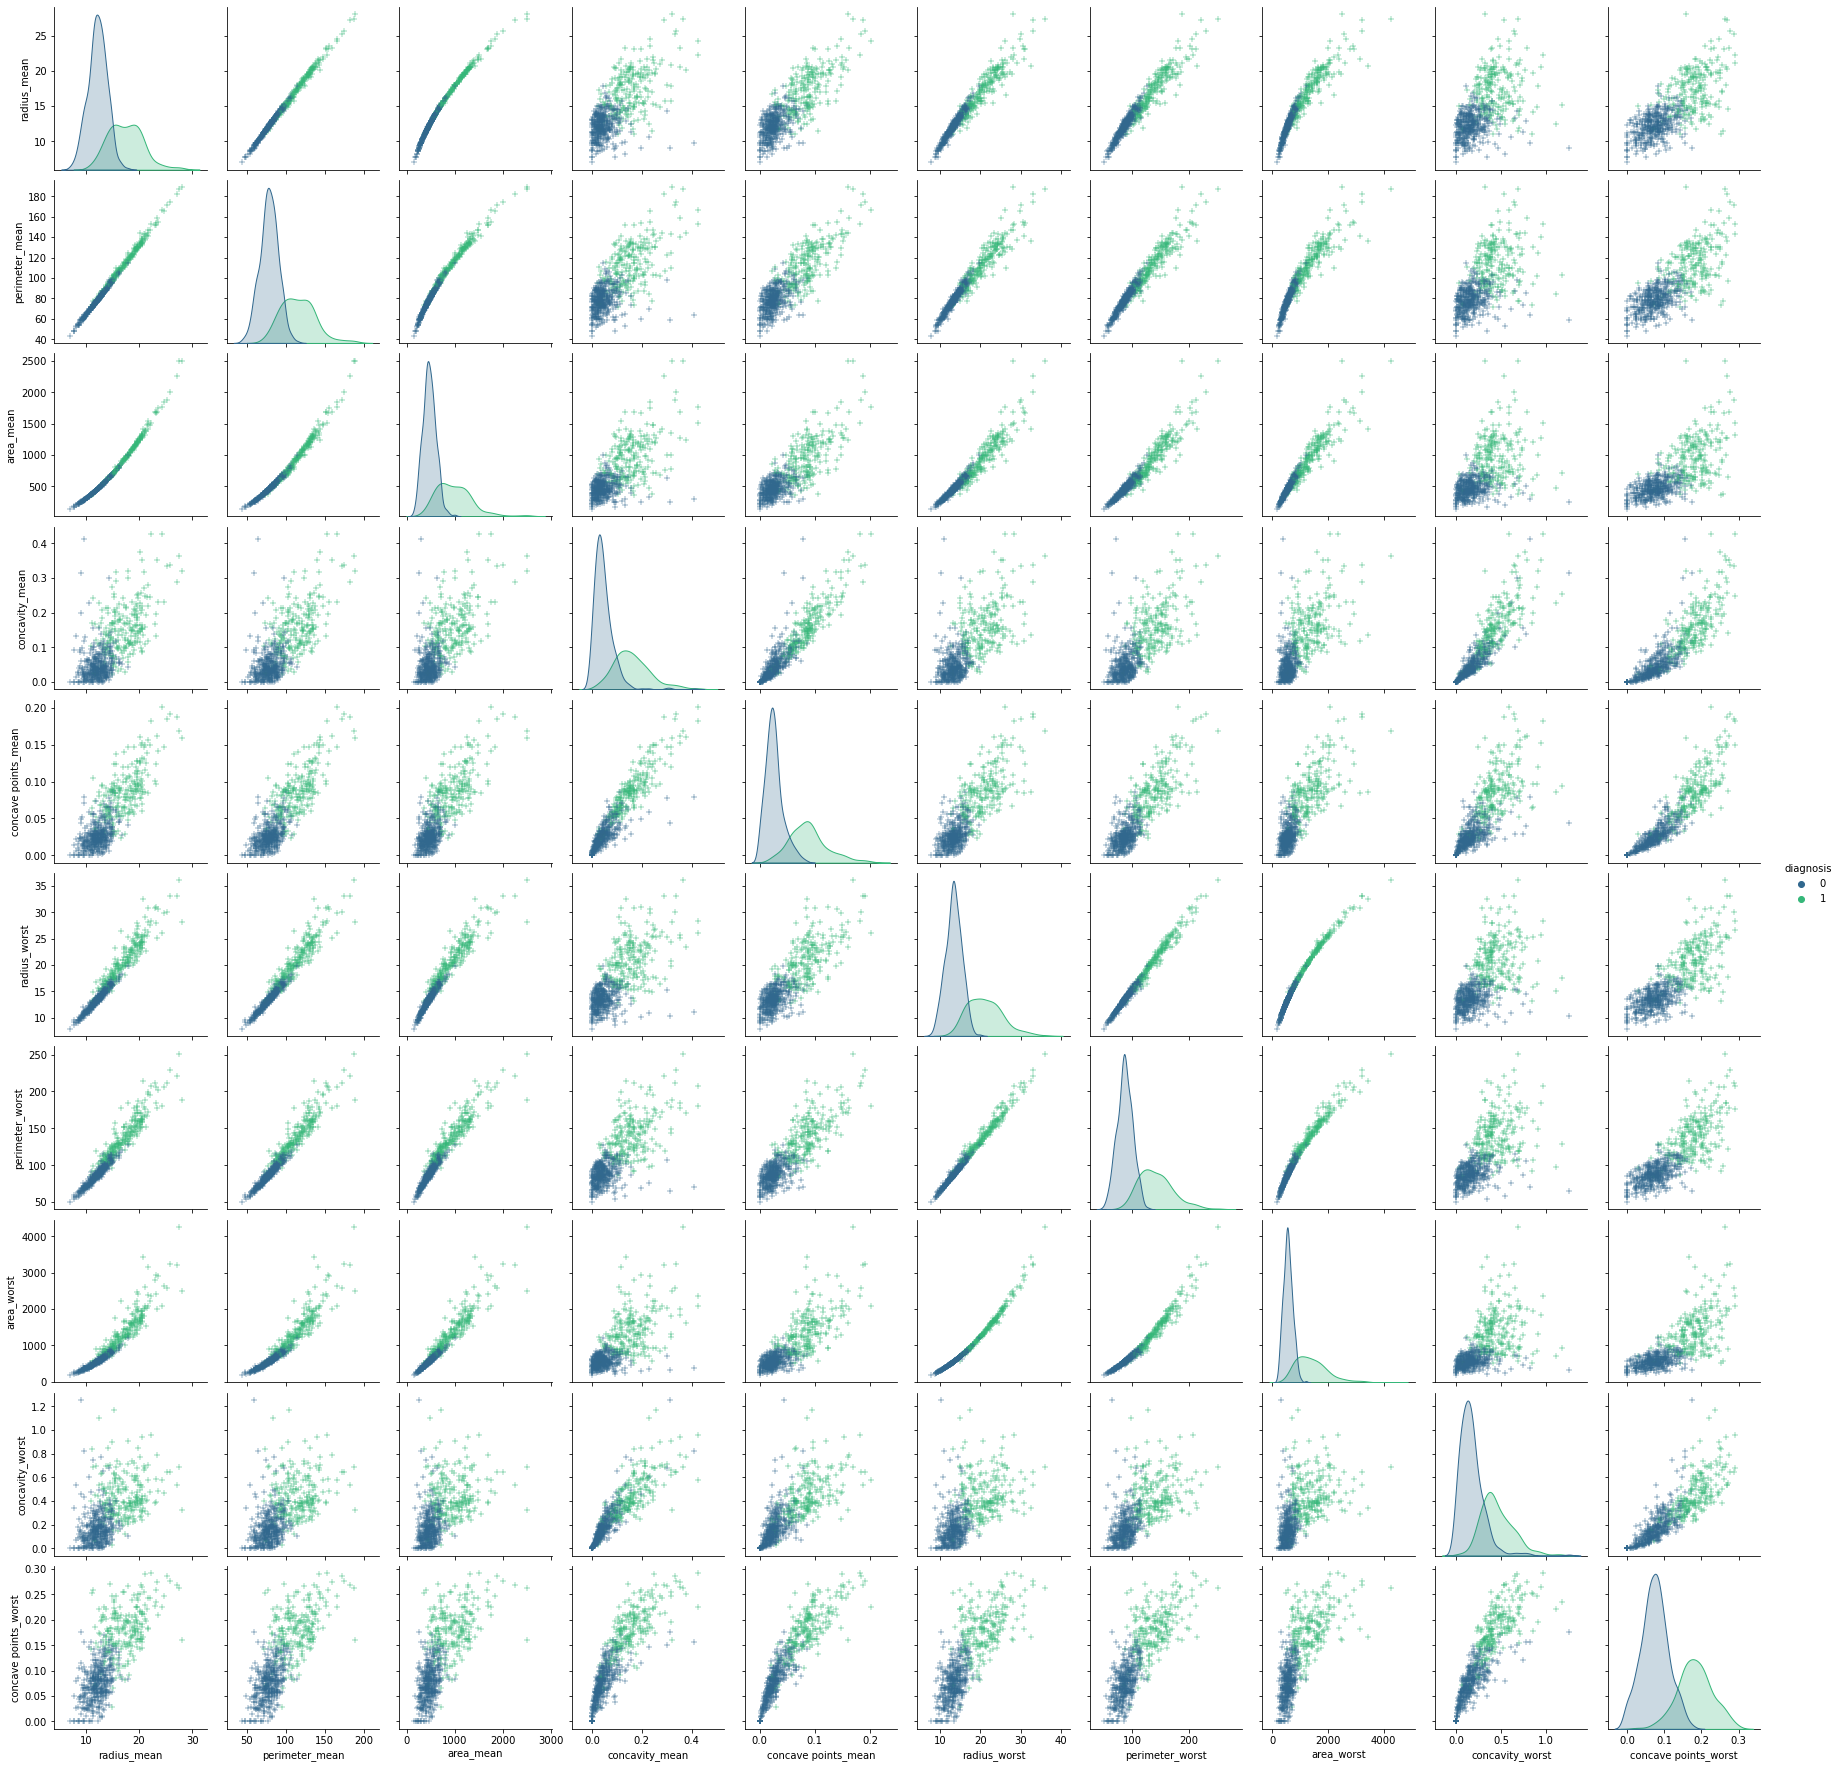

In [12]:
#pair plot
sns.pairplot(df_w[corr_features], diag_kind = "kde", markers = "+", hue = "diagnosis", palette='viridis')
plt.show()

In [13]:
# split the data to X and y before Local Outlier Factorization

y=df_w["diagnosis"]
X=df_w.drop(["diagnosis"],axis=1)
columns= df_w.columns.tolist()

In [16]:
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X, y, test_size=0.25, random_state=42)

## Custom function for Recall, Precision, F1 and Plot_fig w.r.t Datasets

In [18]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_accuracy'],label='validation')
    plt.plot(range(1,epochs+1),history.history['accuracy'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img/'+str(i)+'-accuracy.jpg')
    plt.close(fig)

In [ ]:
## Model Initialization

In [38]:
import tensorflow as tf

nin = X.shape[1]
nh  = 16
nout = 2
epochs = 100 
batch_size = 10

def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(nin, )),
    tf.keras.layers.Dense(nh, activation=activation),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(nout, activation='softmax')
  ])

## Testing best AF w.r.t the Datasets without Grid Search

Epoch 1/100
43/43 [==============================] - 2s 14ms/step - loss: 155.0297 - accuracy: 0.4858 - f1_m: 0.5401 - precision_m: 0.3897 - recall_m: 0.9480 - val_loss: 4.4491 - val_accuracy: 0.8741 - val_f1_m: 0.5333 - val_precision_m: 0.3756 - val_recall_m: 1.0000
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 37.8288 - accuracy: 0.6139 - f1_m: 0.5414 - precision_m: 0.3801 - recall_m: 1.0000 - val_loss: 1.2323 - val_accuracy: 0.9301 - val_f1_m: 0.5333 - val_precision_m: 0.3756 - val_recall_m: 1.0000
Epoch 3/100
43/43 [==============================] - 0s 4ms/step - loss: 8.5215 - accuracy: 0.8399 - f1_m: 0.5162 - precision_m: 0.3606 - recall_m: 0.9928 - val_loss: 4.3903 - val_accuracy: 0.8252 - val_f1_m: 0.5333 - val_precision_m: 0.3756 - val_recall_m: 1.0000
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 8.2943 - accuracy: 0.8072 - f1_m: 0.4780 - precision_m: 0.3262 - recall_m: 1.0000 - val_loss: 1.5985 - val_accuracy: 0.9231 - va

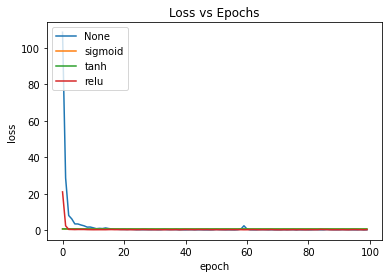

In [46]:
# fit model using Adam optimizer
for activation in [None, 'sigmoid', 'tanh', 'relu']:
    model = create_model()
    opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy',f1_m,precision_m, recall_m])
    history = model.fit(X_train_w, y_train_w,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_w, y_test_w))
    plt.plot(history.history['loss'])
loss_4, accuracy_4, f1_score_4, precision_4, recall_4 = model.evaluate(X_test_w, y_test_w, verbose=0)

plt.title('Loss vs Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper left')

## Final parameter values for Layers in the Models

In [47]:
import json
layer_ = 1
model = create_model()
print("Initial Parameters")
print("----------"*3)
for layer in model.layers:
    g=layer.get_config()
    print('Layer: {}'.format(layer_))
    print("----------"*3)
    print (json.dumps(g, indent=2, default=str))
    layer_ += 1
    print("----------"*3)

Initial Parameters
------------------------------
Layer: 1
------------------------------
{
  "name": "flatten_26",
  "trainable": true,
  "batch_input_shape": [
    null,
    30
  ],
  "dtype": "float32",
  "data_format": "channels_last"
}
------------------------------
Layer: 2
------------------------------
{
  "name": "dense_52",
  "trainable": true,
  "dtype": "float32",
  "units": 16,
  "activation": "relu",
  "use_bias": true,
  "kernel_initializer": {
    "class_name": "GlorotUniform",
    "config": {
      "seed": null
    }
  },
  "bias_initializer": {
    "class_name": "Zeros",
    "config": {}
  },
  "kernel_regularizer": null,
  "bias_regularizer": null,
  "activity_regularizer": null,
  "kernel_constraint": null,
  "bias_constraint": null
}
------------------------------
Layer: 3
------------------------------
{
  "name": "dropout_26",
  "trainable": true,
  "dtype": "float32",
  "rate": 0.2,
  "noise_shape": null,
  "seed": null
}
------------------------------
Layer: 4


<class 'list'>


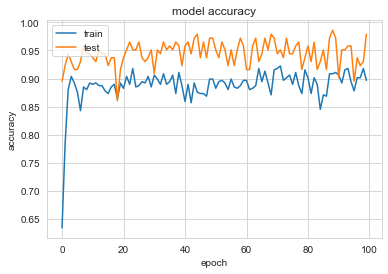

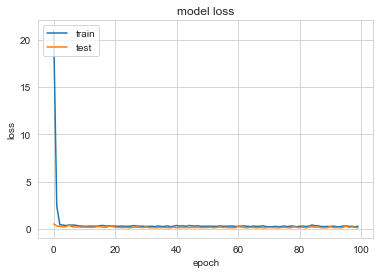

In [51]:
print(type(history.history['accuracy']))
sns.set_style('whitegrid')
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
f1_score_4

0.5484761595726013

## Save the model and its weights with custom function for future usage

In [53]:
model.save(r"C:\Users\User\Downloads\breast_cancer.h5")
model.save_weights(r"C:\Users\User\Downloads\breast_cancer_weights")
model.load_weights(r"C:\Users\User\Downloads\breast_cancer.h5")

# Recreate the exact same model, including its weights and the optimizer
dependencies = {
    'f1_m': f1_m,
    'precision_m':precision_m,
    'recall_m':recall_m,
}
model.load_weights(r"C:\Users\User\Downloads\breast_cancer_weights")
new_model = tf.keras.models.load_model(r"C:\Users\User\Downloads\breast_cancer.h5", custom_objects=dependencies)
new_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc', f1_m, precision_m, recall_m])
# Show the model architecture
new_model.summary()

loss_4, accuracy_4, f1_score_4, precision_4, recall_4 = new_model.evaluate(X_test_w, y_test_w, verbose=0)

print("Loss: " + str(loss_4))
print("Accuracy: " + str(accuracy_4))
print("F1 Score: " + str(f1_score_4))
print("Precision: " + str(precision_4))
print("Recall: " + str(recall_4))

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_26 (Flatten)         (None, 30)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 16)                496       
_________________________________________________________________
dropout_26 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 2)                 34        
Total params: 530
Trainable params: 530
Non-trainable params: 0
_________________________________________________________________
Loss: 9.429183959960938
Accuracy: 0.7692307829856873
F1 Score: 0.5484761595726013
Precision: 0.3799999952316284
Recall: 1.0
